In [77]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler

CPU times: user 41 µs, sys: 20 µs, total: 61 µs
Wall time: 64.6 µs


In [78]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
df

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,c_ACC_z_min,c_ACC_z_max,c_Temp_mean,c_Temp_std,c_Temp_min,c_Temp_max,BVP_peak_freq,TEMP_slope,subject,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-0.8700,0.6110,29.168923,0.064290,28.994568,29.426208,0.081425,-0.000253,2,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-0.7594,-0.6810,28.886605,0.074846,28.730682,29.207275,0.147017,-0.000161,2,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-0.7534,-0.6754,28.799659,0.037924,28.679108,28.988800,0.088210,0.000535,2,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-0.7878,0.1660,28.768865,0.058639,28.584656,29.023285,0.117614,-0.000256,2,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-0.7202,-0.6570,28.598514,0.068128,28.447449,28.882599,0.151541,0.000260,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.036762,0.007911,0.000000,0.058485,-0.036741,0.008011,-0.058485,0.008257,-0.000025,5.512148e-06,...,-0.9478,-0.7038,33.943786,0.026213,33.808136,34.097076,0.119876,-0.000075,17,3
781,0.032120,0.005324,0.001376,0.055732,-0.032117,0.005343,-0.055732,0.002752,-0.000022,3.676049e-06,...,-0.9446,-0.7414,33.939625,0.025553,33.753479,34.144348,0.065592,-0.000117,17,3
782,0.026901,0.000517,0.024770,0.028210,-0.026901,0.000517,-0.028210,-0.024770,-0.000019,3.554577e-07,...,-0.9718,-0.7698,34.002778,0.034897,33.864288,34.191650,0.108567,0.000454,17,3


In [5]:
df.shape

(785, 72)

In [6]:
df.columns

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max', 'ACC_y_mean',
       'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean', 'ACC_z_std',
       'ACC_z_min', 'ACC_z_max', 'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max',
       'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EDA_mean', 'EDA_std',
       'EDA_min', 'EDA_max', 'EDA_phasic_mean', 'EDA_phasic_std',
       'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean', 'EDA_smna_std',
       'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean', 'EDA_tonic_std',
       'EDA_tonic_min', 'EDA_tonic_max', 'EMG_mean', 'EMG_std', 'EMG_min',
       'EMG_max', 'Resp_mean', 'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean',
       'TEMP_std', 'TEMP_min', 'TEMP_max', 'c_ACC_x_mean', 'c_ACC_x_std',
       'c_ACC_x_min', 'c_ACC_x_max', 'c_ACC_y_mean', 'c_ACC_y_std',
       'c_ACC_y_min', 'c_ACC_y_max', 'c_ACC_z_mean', 'c_ACC_z_std',
       'c_ACC_z_min', 'c_ACC_z_max', 'c_Temp_mean',

In [79]:
%%time
# df=df[df['target']!=]
df=df[df['label']!=2]
df=df[df['label']!=3]

CPU times: user 5.47 ms, sys: 0 ns, total: 5.47 ms
Wall time: 3.94 ms


In [9]:
df.shape

(487, 72)

In [10]:
df['label'].unique()

array([0, 1])

In [11]:
df.head()

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,c_ACC_z_min,c_ACC_z_max,c_Temp_mean,c_Temp_std,c_Temp_min,c_Temp_max,BVP_peak_freq,TEMP_slope,subject,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-0.8700,0.6110,29.168923,0.064290,28.994568,29.426208,0.081425,-0.000253,2,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-0.7594,-0.6810,28.886605,0.074846,28.730682,29.207275,0.147017,-0.000161,2,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-0.7534,-0.6754,28.799659,0.037924,28.679108,28.988800,0.088210,0.000535,2,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-0.7878,0.1660,28.768865,0.058639,28.584656,29.023285,0.117614,-0.000256,2,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-0.7202,-0.6570,28.598514,0.068128,28.447449,28.882599,0.151541,0.000260,2,0


In [80]:
features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)
features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

70


71

In [81]:
sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,c_ACC_z_min,c_ACC_z_max,c_Temp_mean,c_Temp_std,c_Temp_min,c_Temp_max,BVP_peak_freq,TEMP_slope,subject,label
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-0.870000,0.611000,29.168923,0.064290,28.994568,29.426208,0.081425,-0.000253,2.000000,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-0.759400,-0.681000,28.886605,0.074846,28.730682,29.207275,0.147017,-0.000161,2.000000,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-0.753400,-0.675400,28.799659,0.037924,28.679108,28.988800,0.088210,0.000535,2.000000,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-0.787800,0.166000,28.768865,0.058639,28.584656,29.023285,0.117614,-0.000256,2.000000,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-0.720200,-0.657000,28.598514,0.068128,28.447449,28.882599,0.151541,0.000260,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.028499,0.005744,0.009549,0.049915,-0.006100,0.005744,-0.015845,0.024521,-0.000004,3.952020e-06,...,-0.540288,0.048413,34.173330,0.037962,34.020692,34.347792,0.150990,-0.000174,15.151558,1
620,0.037179,0.001151,0.023449,0.050451,-0.001681,0.001151,-0.014134,0.012868,-0.000001,7.917207e-07,...,-0.749950,-0.539231,34.179298,0.031306,34.074914,34.339609,0.123940,0.000388,12.392020,1
621,0.037896,0.004781,0.003547,0.056589,0.037896,0.004781,0.003547,0.056589,0.000026,3.289295e-06,...,-0.374418,0.053229,34.265974,0.034625,34.133383,34.413883,0.085883,0.000197,15.314008,1
622,0.028627,0.002078,0.019131,0.044707,0.021569,0.002078,0.012419,0.037995,0.000015,1.429441e-06,...,-0.328649,0.046121,34.319910,0.027538,34.228198,34.463565,0.122004,-0.000229,15.512260,1


In [28]:
# #random oversampling
# ros = RandomOverSampler(random_state=0)
# X, y= ros.fit_resample(df[features_with_sub], df['label'])
# df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
# df_new

In [82]:
# for i in range(len(list(df_new['subject']))):
#         df_new[df_new['subject']][i]=min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-list(df_new[df_new['subject']])[i]))


for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
p_d=pd.read_csv('personal_detail.csv',index_col=0)

In [84]:
df_new_1=df_new.merge(p_d,on='subject')
df_new_1

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.031629,0.001143,0.028210,0.039219,-0.031629,0.001143,-0.039219,-0.028210,-0.000022,7.864926e-07,...,1,29,165,55,1,0,0,0,0,0
620,0.033437,0.001540,0.013073,0.051604,-0.033437,0.001540,-0.051604,-0.013073,-0.000023,1.059291e-06,...,1,29,165,55,1,0,0,0,0,0
621,0.031757,0.001600,0.013761,0.037155,-0.031757,0.001600,-0.037155,-0.013761,-0.000022,1.101023e-06,...,1,29,165,55,1,0,0,0,0,0
622,0.029441,0.002093,0.020770,0.054100,-0.004075,0.002093,-0.014956,0.018375,-0.000003,1.440095e-06,...,1,29,165,55,1,0,0,0,0,0


In [85]:
df_new_1['label'].value_counts()

1    312
0    312
Name: label, dtype: int64

In [86]:
features=df_new_1.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)
features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

79


80

In [87]:
train=df_new_1[df_new_1['subject']<=9]
test=df_new_1[df_new_1['subject']>9]

In [20]:
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.transform(test[feature])

In [26]:

for i in range (0,500):
    #print (i)
    et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=i ,)
    et.fit(scaled_data_train,train['label'])
    y_pred=et.predict(scaled_data_test)
   
    if ((classification_report(test['label'],y_pred,output_dict=True)['accuracy'])>=.96):
        print(i)
        print(classification_report(test['label'],y_pred))

In [24]:

#c+w
#62,70

for i in range (101):
    #print (i)
    et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=i ,)
    et.fit(train[feature],train['label'])
    y_pred=et.predict(test[feature])
   
    if ((classification_report(test['label'],y_pred,output_dict=True)['0']['recall'])>.65):
        print(i)
        print(classification_report(test['label'],y_pred))

0
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       147
           1       0.93      0.90      0.91       161

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

1
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       147
           1       0.91      0.84      0.87       161

    accuracy                           0.87       308
   macro avg       0.87      0.88      0.87       308
weighted avg       0.88      0.87      0.87       308

2
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       147
           1       0.90      0.94      0.92       161

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

3
           

25
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       147
           1       0.91      0.91      0.91       161

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

26
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       147
           1       0.95      0.93      0.94       161

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308

27
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       147
           1       0.94      0.89      0.92       161

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308

28
       

50
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       147
           1       0.97      0.88      0.92       161

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.93      0.92      0.92       308

51
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       147
           1       0.94      0.88      0.91       161

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

52
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       147
           1       0.95      0.88      0.91       161

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

53
       

75
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       147
           1       0.94      0.84      0.89       161

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308

76
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       147
           1       0.93      0.89      0.91       161

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

77
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       147
           1       0.93      0.96      0.94       161

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308

78
       

100
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       147
           1       0.97      0.88      0.93       161

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



In [23]:
for i in range (101):
    #print (i)
    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i)
    et.fit(X,train['label'])
    y_pred=et.predict(X_test)
    #print(classification_report(test['label'],y_pred))
    if ((classification_report(test['label'],y_pred,output_dict=True)['0']['recall'])>.60 and (classification_report(test['label'],y_pred,output_dict=True)['2']['recall'])>.60):
        print(classification_report(test['label'],y_pred))

ValueError: Number of labels=316 does not match number of samples=624

In [21]:
et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       147
           1       0.87      0.95      0.91       161

    accuracy                           0.90       308
   macro avg       0.91      0.90      0.90       308
weighted avg       0.91      0.90      0.90       308



In [27]:
feature

['net_acc_mean',
 'net_acc_std',
 'net_acc_min',
 'net_acc_max',
 'ACC_x_mean',
 'ACC_x_std',
 'ACC_x_min',
 'ACC_x_max',
 'ACC_y_mean',
 'ACC_y_std',
 'ACC_y_min',
 'ACC_y_max',
 'ACC_z_mean',
 'ACC_z_std',
 'ACC_z_min',
 'ACC_z_max',
 'BVP_mean',
 'BVP_std',
 'BVP_min',
 'BVP_max',
 'ECG_mean',
 'ECG_std',
 'ECG_min',
 'ECG_max',
 'EDA_mean',
 'EDA_std',
 'EDA_min',
 'EDA_max',
 'EDA_phasic_mean',
 'EDA_phasic_std',
 'EDA_phasic_min',
 'EDA_phasic_max',
 'EDA_smna_mean',
 'EDA_smna_std',
 'EDA_smna_min',
 'EDA_smna_max',
 'EDA_tonic_mean',
 'EDA_tonic_std',
 'EDA_tonic_min',
 'EDA_tonic_max',
 'EMG_mean',
 'EMG_std',
 'EMG_min',
 'EMG_max',
 'Resp_mean',
 'Resp_std',
 'Resp_min',
 'Resp_max',
 'TEMP_mean',
 'TEMP_std',
 'TEMP_min',
 'TEMP_max',
 'c_ACC_x_mean',
 'c_ACC_x_std',
 'c_ACC_x_min',
 'c_ACC_x_max',
 'c_ACC_y_mean',
 'c_ACC_y_std',
 'c_ACC_y_min',
 'c_ACC_y_max',
 'c_ACC_z_mean',
 'c_ACC_z_std',
 'c_ACC_z_min',
 'c_ACC_z_max',
 'c_Temp_mean',
 'c_Temp_std',
 'c_Temp_min',
 '

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


In [89]:
rfecv = RFECV(estimator=et, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(train[feature],train['label'])

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=50, n_jobs=10,
                                     oob_score=False, random_state=499,
                                     verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [90]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 20


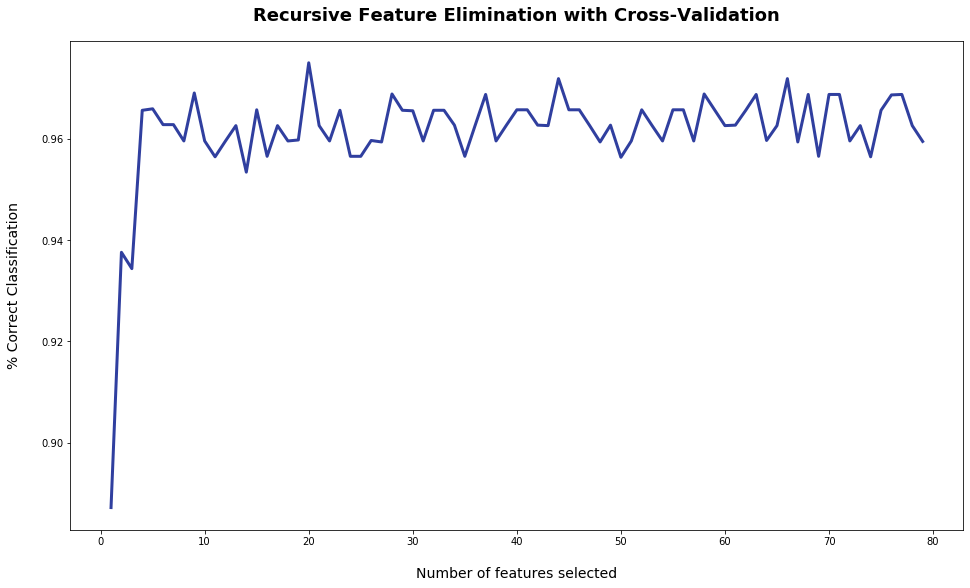

In [91]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [92]:
print(np.where(rfecv.support_ == False)[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 25
 29 30 34 35 37 40 41 42 43 44 46 49 53 54 56 57 58 59 61 62 63 64 65 66
 67 68 70 71 72 73 74 75 76 77 78]


In [93]:
X=train[feature]
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

/home/sf/.local/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
rfecv.ranking_

array([17, 41, 44, 26,  3, 21, 37, 40, 19, 45, 57, 27,  1, 28, 38, 20, 56,
       31, 42, 50, 51,  9, 18, 25,  1, 10,  1,  1,  1,  5,  6,  1,  1,  1,
       60,  4,  1, 12,  1,  1, 16, 52, 35, 32, 43,  1, 13,  1,  1, 30,  1,
        1,  1, 24, 54,  1,  8, 48, 49, 34,  1, 23, 14,  2,  7, 58, 11, 15,
       22,  1, 46, 33, 39, 55, 36, 29, 53, 47, 59])

In [95]:
print(rfecv.support_)

[False False False False False False False False False False False False
  True False False False False False False False False False False False
  True False  True  True  True False False  True  True  True False False
  True False  True  True False False False False False  True False  True
  True False  True  True  True False False  True False False False False
  True False False False False False False False False  True False False
 False False False False False False False]


In [96]:
len(rfecv.estimator_.feature_importances_)

20

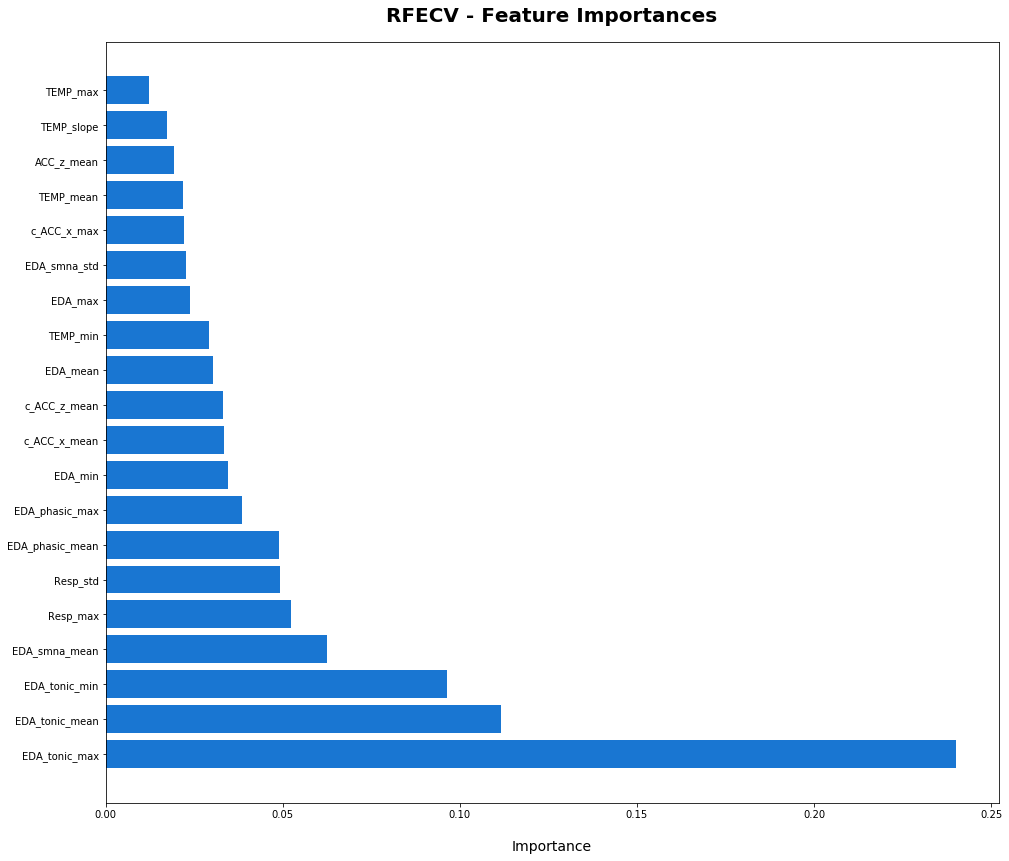

In [97]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [98]:
dset['attr']

10      EDA_tonic_max
8      EDA_tonic_mean
9       EDA_tonic_min
6       EDA_smna_mean
12           Resp_max
11           Resp_std
4     EDA_phasic_mean
5      EDA_phasic_max
2             EDA_min
16       c_ACC_x_mean
18       c_ACC_z_mean
1            EDA_mean
14           TEMP_min
3             EDA_max
7        EDA_smna_std
17        c_ACC_x_max
13          TEMP_mean
0          ACC_z_mean
19         TEMP_slope
15           TEMP_max
Name: attr, dtype: object

In [105]:
feature_new=['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','smoker_YES','ACC_y_min','ACC_x_mean','weight','gender_ female','c_Temp_max','ACC_x_max','TEMP_mean',
          'c_ACC_y_std','net_acc_max','Resp_std']

In [106]:
feature_new=feature_new.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [101]:
train[feature_new]

,EDA_tonic_max,EDA_tonic_mean,EDA_tonic_min,EDA_smna_mean,Resp_max,Resp_std,EDA_phasic_mean,EDA_phasic_max,EDA_min,c_ACC_x_mean,c_ACC_z_mean,EDA_mean,TEMP_min,EDA_max,EDA_smna_std,c_ACC_x_max,TEMP_mean,ACC_z_mean,TEMP_slope,TEMP_max
0,2.554750,0.802956,-1.213173,1.376535,6.742859,2.890267,1.967362,4.459367,1.014138,0.771306,-0.440456,1.303625,35.750000,1.678399,2.448135,1.145400,35.807285,0.000016,-0.000253,35.870000
1,2.037179,1.356138,0.912441,0.107952,3.730774,1.596604,0.165267,0.544346,0.693996,0.619743,-0.715456,0.892549,35.660000,1.190967,0.223359,0.644200,35.706833,0.000019,-0.000161,35.750000
2,0.907833,0.594655,0.112270,0.032987,3.450012,1.591127,0.034136,0.195283,0.486494,0.620906,-0.714748,0.598712,35.710000,0.718106,0.113638,0.646000,35.775430,0.000020,0.000535,35.840000
3,0.312631,0.119998,-0.202700,0.167003,5.216980,1.879271,0.223355,0.669836,0.470152,0.668722,-0.628923,0.504760,35.770000,0.568963,0.451401,0.935000,35.830724,0.000023,-0.000256,35.890000
4,0.344243,0.191593,0.008598,0.001634,3.028870,1.414976,0.004533,0.063415,0.395535,0.641137,-0.695219,0.456286,35.770000,0.517990,0.009980,0.665000,35.798869,0.000025,0.000260,35.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1.409709,1.183028,0.848915,0.225563,16.876990,4.850359,0.294813,0.553913,3.453431,0.803992,-0.419182,3.639418,33.090106,3.848324,0.399256,0.936026,33.125486,0.000026,-0.000237,33.156808
312,1.504566,1.345943,1.209618,0.092824,12.141198,3.689281,0.118530,0.284056,1.186328,0.836427,-0.392351,1.256311,33.527959,1.328788,0.198844,0.906021,33.597790,0.000028,-0.000530,33.649278
313,1.999980,1.814833,1.554143,0.107472,25.093782,7.397418,0.146932,0.422515,8.356053,0.895596,-0.168767,9.044468,33.785991,9.446335,0.275369,1.117158,33.875304,0.000023,-0.000795,33.954992
314,0.883535,-0.326525,-1.492209,1.178049,16.135616,5.565096,1.455426,2.848745,5.316579,0.854544,-0.300843,5.824319,32.804076,6.400912,2.432167,1.059525,32.846921,0.000018,-0.000219,32.874076


In [102]:
test

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
316,0.022275,0.006684,0.003440,0.055044,0.022275,0.006684,0.003440,0.055044,0.000015,4.598998e-06,...,0,28,178,76,0,0,0,0,0,0
317,0.021397,0.003507,0.007569,0.050228,0.021397,0.003507,0.007569,0.050228,0.000015,2.412737e-06,...,0,28,178,76,0,0,0,0,0,0
318,0.025337,0.003428,0.015137,0.053668,0.025337,0.003428,0.015137,0.053668,0.000017,2.358348e-06,...,0,28,178,76,0,0,0,0,0,0
319,0.025442,0.001440,0.018577,0.030274,0.025442,0.001440,0.018577,0.030274,0.000018,9.908448e-07,...,0,28,178,76,0,0,0,0,0,0
320,0.023126,0.003274,0.008257,0.048164,0.023126,0.003274,0.008257,0.048164,0.000016,2.252830e-06,...,0,28,178,76,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.031629,0.001143,0.028210,0.039219,-0.031629,0.001143,-0.039219,-0.028210,-0.000022,7.864926e-07,...,1,29,165,55,1,0,0,0,0,0
620,0.033437,0.001540,0.013073,0.051604,-0.033437,0.001540,-0.051604,-0.013073,-0.000023,1.059291e-06,...,1,29,165,55,1,0,0,0,0,0
621,0.031757,0.001600,0.013761,0.037155,-0.031757,0.001600,-0.037155,-0.013761,-0.000022,1.101023e-06,...,1,29,165,55,1,0,0,0,0,0
622,0.029441,0.002093,0.020770,0.054100,-0.004075,0.002093,-0.014956,0.018375,-0.000003,1.440095e-06,...,1,29,165,55,1,0,0,0,0,0


In [107]:
et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
et.fit(train[feature_new],train['label'])
y_pred=et.predict(test[feature_new])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       147
           1       0.85      0.87      0.86       161

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [109]:
# 261 best accuracy
for i in range (101,500):
    #print (i)
    et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=i ,)
    et.fit(train[feature_new],train['label'])
    y_pred=et.predict(test[feature_new])
   
    if ((classification_report(test['label'],y_pred,output_dict=True)['accuracy'])>=.90):
        print(i)
        print(classification_report(test['label'],y_pred))

176
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       147
           1       0.92      0.91      0.91       161

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308

366
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       147
           1       0.89      0.93      0.91       161

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308

